# Python Data Analysis Report

## Prevalence and Factors Associated with Hypertension among People Living with HIV (PLWHIV) 

<!-- ### Data Analysis Plan:
1. Introduction
2. Exploratory data analysis
3. Prevalence of hypertension in PLWHIV on ART or not
4. Factors associated with hypertension in PLWHIV on ART or not
5. Conclusion 
6. Recommendations -->

*Boni Maxime Ale*

*NYC Data Science Academy*

*21 February 2022*

### Introduction
Hypertension is a major modifiable risk factor for cardiovascular diseases (CVD) globally. In low- and middle-income settings, including sub-Saharan Africa (SSA), hypertension prevalence has been increasing rapidly over the past several decades. The World Health Organization (WHO) estimates that 46% of individuals >25 years in SSA have hypertension, with rising rates due to demographic transitions that have led to sedentary lifestyles, smoking, harmful alcohol use and consumption of processed foods [1–3]. Estimates of hypertension prevalence in Kenya are high (ranging from 12.6–36.9%) with higher rates in urban areas [1, 4, 5]. Older age, higher body mass index (BMI), alcohol consumption, cigarette smoking, and higher socioeconomic status have been associated with hypertension in previous studies in Kenya [5–7].

However, hypertension diagnosis and treatment are often delayed due to its asymptomatic nature, leading to increased risk of complications and mortality [8]. In SSA, screening, diagnosis, and treatment remain inadequate [9] and a recent study found that 40% of individuals with hypertension in East and West Africa were unaware of their status. The WHO 2017 report on non-communicable diseases (NCD) risk factors identified hypertension as the leading cause of death across income levels [10]. In 2015, hypertension caused an estimated 7.5 million deaths, accounting for 12.8% of all deaths globally [11]. In particular, sub-Saharan Africa (SSA) is facing a dual burden of communicable and non-communicable diseases, including CVD and cancers, with fewer resources for managing NCD [1, 12, 13].

The widespread use of antiretroviral therapy (ART) in SSA has resulted in a near normal life expectancy among persons with HIV (PWH); overall approximately 76% of PWH in SSA are virally suppressed [14]. This increased lifespan, however, may lead to an increased risk of NCD, including hypertension, due to the HIV virus and ART toxicity [14–17]. Studies on hypertension in PWH have shown varied results, some showing higher prevalence of hypertension while others showing no differences or lower prevalence of hypertension among PWH [18, 19]. The majority of studies have included PWH who are ART naïve or on ART but with poorly controlled viral loads compared to HIV-negative individuals in SSA [15, 18, 20, 21]. Data are lacking among PWH who are virally suppressed on ART. We sought to estimate the prevalence of hypertension among virally suppressed PWH on long-term ART compared to HIV-negative adults in western Kenya and identify factors associated with hypertension. These data can help guide prevention strategies and inform allocation of resources for integrated hypertension and HIV management.

### Materials and Methods

* Study design and Setting 


* Definition of variables



* Statistical Analysis

### Data Analysis and Results

* Exploratory Data Analysis

In [2]:
## Import library 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Loading data
hiv = pd.read_csv("dataset_plos.csv", index_col = "year", parse_dates = True)

## check the first 5 observations of the data set
hiv.head(5)
print(hiv.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43938 entries, 2008-01-01 to 2016-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           43935 non-null  float64
 1   age           43928 non-null  float64
 2   priorhivtest  43786 non-null  float64
 3   treatment     2462 non-null   float64
 4   hivresult     42737 non-null  float64
 5   hivnew        40275 non-null  float64
 6   cd4_cat       3055 non-null   float64
 7   bp_cat        43536 non-null  float64
 8   bmi_cat       43535 non-null  float64
 9   stisymptoms   43938 non-null  int64  
 10  tbsymptoms    43938 non-null  int64  
 11  diabsymptoms  43938 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 4.4 MB
None


In [4]:
## let's create a copy of hiv dataset for data wrangling
hiv2 = hiv.copy()

In [5]:
## Gender
## change sex data type 
hiv2['sex'] = hiv2['sex'].astype('category')
## rename gender category
hiv2['sex'] = hiv2['sex'].cat.rename_categories({2:"female",1: "male"})

## let's decribe the number of male and female 
print(hiv2["sex"].value_counts())

## and get there percentage
print(hiv2["sex"].value_counts(normalize = True))

female    22178
male      21757
Name: sex, dtype: int64
female    0.504791
male      0.495209
Name: sex, dtype: float64


In [6]:
## Blood Pressure
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary = {1 : "Normal",
                        2: "Normal",
                        3: "Normal",
                        4 : "High",
                        5 : "High",
                        6 : "High",
                        7 : "Normal"
                        }

hiv2['bp_cat2'] = hiv2['bp_cat'].replace(conversion_dictionary)

## let's see the frequency in each group
print(hiv2["bp_cat2"].value_counts())

print(hiv2["bp_cat2"].value_counts(normalize = True))

Normal    34588
High       8948
Name: bp_cat2, dtype: int64
Normal    0.794469
High      0.205531
Name: bp_cat2, dtype: float64


In [7]:
## let's see the proportion of hypertension by gender
pd.crosstab(hiv2["sex"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
sex,,,
male,4586,17000,21586
female,4362,17585,21947
All,8948,34585,43533


In [8]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

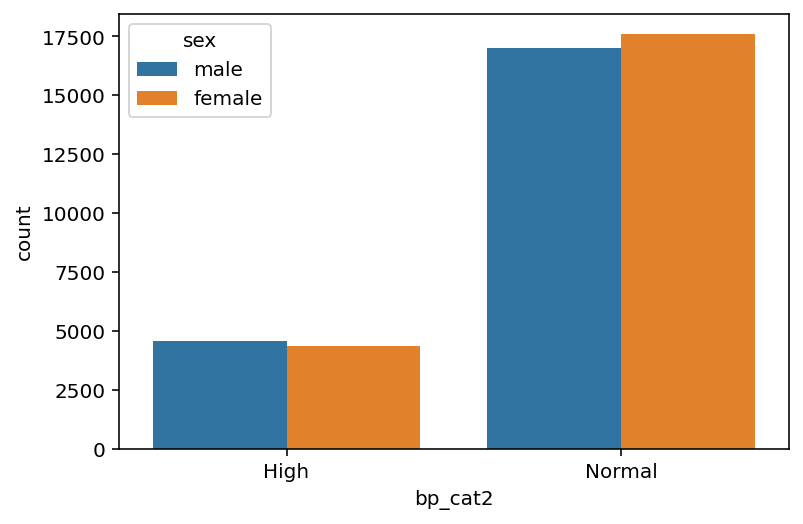

In [11]:
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
sns.countplot(x="bp_cat2", hue="sex", data=hiv2);